In [228]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras 
from keras.models import Sequential 
from keras.layers import Dense

In [229]:
titanic=pd.read_csv('/titanic (1).csv')

In [230]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,1,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,0,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,1,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,1,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,0,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [231]:
#explore missing data
missing_df = titanic.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['filling_factor'] = (titanic.shape[0] - missing_df['missing_count']) / titanic.shape[0] * 100
missing_df = missing_df.sort_values('filling_factor').reset_index(drop = True)
missing_df

,column_name,missing_count,filling_factor
0,Cabin,327,21.770335
1,Age,86,79.425837
2,Fare,1,99.760766
3,PassengerId,0,100.000000
4,Survived,0,100.000000
5,Pclass,0,100.000000
6,Name,0,100.000000
7,Sex,0,100.000000
8,SibSp,0,100.000000
9,Parch,0,100.000000


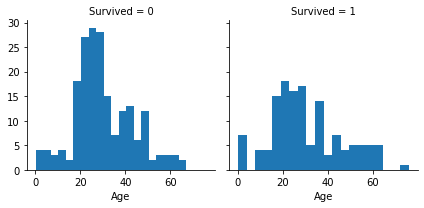

In [232]:
#analyze with visualizing data
#Oldest passengers (Age = 80) survived.
#Large number of 15-25 year olds did not survive.
g = sns.FacetGrid(titanic, col='Survived')
g.map(plt.hist, 'Age', bins=20)

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


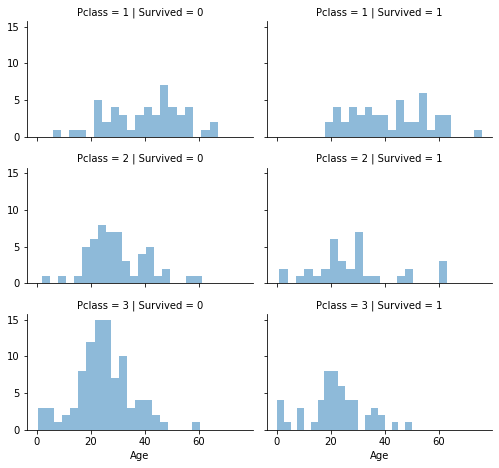

In [233]:
#Pclass=3 had most passengers, however most did not survive
#passengers in Pclass=2 and Pclass=3 mostly survived
#Most passengers in Pclass=3 survived
grid = sns.FacetGrid(titanic, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


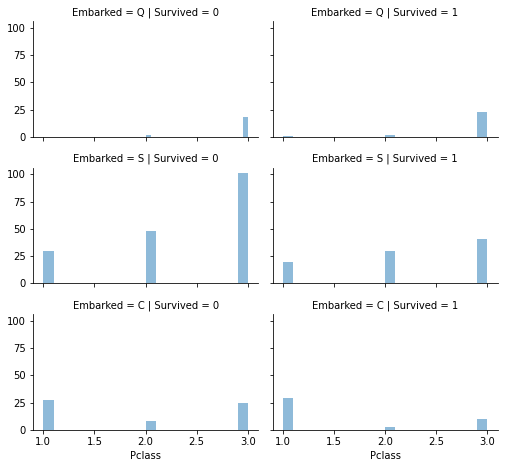

In [234]:
#Female passengers had much better survival rate than males
#Males had better survival rate in Pclass=3 and Pclass=2 
 
grid = sns.FacetGrid(titanic, col='Survived', row='Embarked',  size=2.2, aspect=1.6)
grid.map(plt.hist,'Pclass', alpha=.5, bins=20)
grid.add_legend()

In [235]:
#drop uimportant columns
titanic = titanic.drop(['Ticket', 'Cabin','Name', 'PassengerId'], axis=1)

In [236]:
#handling missing data in age by mean
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())
titanic.head(20)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,male,34.50000,0,0,7.8292,Q
1,0,3,female,47.00000,1,0,7.0000,S
2,1,2,male,62.00000,0,0,9.6875,Q
3,1,3,male,27.00000,0,0,8.6625,S
4,0,3,female,22.00000,1,1,12.2875,S
5,1,3,male,14.00000,0,0,9.2250,S
6,0,3,female,30.00000,0,0,7.6292,Q
7,1,2,male,26.00000,1,1,29.0000,S
8,0,3,female,18.00000,0,0,7.2292,C
9,1,3,male,21.00000,2,0,24.1500,S


In [209]:
titanic.Age.isnull().sum()

0

In [210]:
titanic['Age'] = titanic['Age'].astype(int)

In [211]:
#handling missing data in fare by mean
titanic['Fare'] = titanic['Fare'].fillna(titanic['Fare'].mean())
titanic.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,male,34,0,0,7.8292,Q
1,0,3,female,47,1,0,7.0000,S
2,1,2,male,62,0,0,9.6875,Q
3,1,3,male,27,0,0,8.6625,S
4,0,3,female,22,1,1,12.2875,S
5,1,3,male,14,0,0,9.2250,S
6,0,3,female,30,0,0,7.6292,Q
7,1,2,male,26,1,1,29.0000,S
8,0,3,female,18,0,0,7.2292,C
9,1,3,male,21,2,0,24.1500,S


In [212]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      418 non-null    float64
 7   Embarked  418 non-null    object 
dtypes: float64(1), int64(5), object(2)
memory usage: 26.2+ KB


In [213]:
# create a new feature "Family"
titanic['Family'] = titanic['SibSp'] + titanic['Parch'] + 1

 

In [214]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,1,3,male,34,0,0,7.8292,Q,1
1,0,3,female,47,1,0,7.0000,S,2
2,1,2,male,62,0,0,9.6875,Q,1
3,1,3,male,27,0,0,8.6625,S,1
4,0,3,female,22,1,1,12.2875,S,3


In [215]:
titanic['Family'].value_counts()

1     253
2      74
3      57
4      14
5       7
7       4
11      4
6       3
8       2
Name: Family, dtype: int64

In [216]:
#We can see that the survival rate increases with the family size, but not beyond Family = 4. Also, the amount of people in big families is much lower than those in small families. I will combine all the data with Family > 4 into one category
titanic.Family = titanic.Family.map(lambda x: 0 if x > 4 else x)
titanic[['Family', 'Survived']].groupby(['Family'], as_index=False).mean()

,Family,Survived
0,0,0.350000
1,1,0.292490
2,2,0.500000
3,3,0.578947
4,4,0.571429


In [217]:
titanic = titanic.drop([ 'SibSp' , 'Parch'], axis=1)

In [218]:
titanic_DT= titanic
titanic_DT.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,1,3,male,34,7.8292,Q,1
1,0,3,female,47,7.0000,S,2
2,1,2,male,62,9.6875,Q,1
3,1,3,male,27,8.6625,S,1
4,0,3,female,22,12.2875,S,3


In [219]:
dummies = []
cols = ['Pclass','Sex','Embarked']
for col in cols:
 dummies.append(pd.get_dummies(titanic_DT[col]))

In [220]:
titanic_dummies = pd.concat(dummies, axis=1)
titanic_dummies.head()

,1,2,3,female,male,C,Q,S
0,0,0,1,0,1,0,1,0
1,0,0,1,1,0,0,0,1
2,0,1,0,0,1,0,1,0
3,0,0,1,0,1,0,0,1
4,0,0,1,1,0,0,0,1


In [221]:
titanic_DT = pd.concat((titanic_DT,titanic_dummies),axis=1)
titanic_DT.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family,1,2,3,female,male,C,Q,S
0,1,3,male,34,7.8292,Q,1,0,0,1,0,1,0,1,0
1,0,3,female,47,7.0000,S,2,0,0,1,1,0,0,0,1
2,1,2,male,62,9.6875,Q,1,0,1,0,0,1,0,1,0
3,1,3,male,27,8.6625,S,1,0,0,1,0,1,0,0,1
4,0,3,female,22,12.2875,S,3,0,0,1,1,0,0,0,1


In [222]:
titanic_DT = titanic_DT.drop(['Pclass','Sex','Embarked'],axis=1)
titanic_DT.head()

,Survived,Age,Fare,Family,1,2,3,female,male,C,Q,S
0,1,34,7.8292,1,0,0,1,0,1,0,1,0
1,0,47,7.0000,2,0,0,1,1,0,0,0,1
2,1,62,9.6875,1,0,1,0,0,1,0,1,0
3,1,27,8.6625,1,0,0,1,0,1,0,0,1
4,0,22,12.2875,3,0,0,1,1,0,0,0,1


In [223]:
titanic_DT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Age       418 non-null    int64  
 2   Fare      418 non-null    float64
 3   Family    418 non-null    int64  
 4   1         418 non-null    uint8  
 5   2         418 non-null    uint8  
 6   3         418 non-null    uint8  
 7   female    418 non-null    uint8  
 8   male      418 non-null    uint8  
 9   C         418 non-null    uint8  
 10  Q         418 non-null    uint8  
 11  S         418 non-null    uint8  
dtypes: float64(1), int64(3), uint8(8)
memory usage: 16.5 KB


In [224]:
y = titanic_DT['Survived'].values
titanic_ml= titanic_DT.drop(['Survived'],1)
X = titanic_ml.values
titanic_ml.head()

<ipython-input-224-b53d49f3542a>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  titanic_ml= titanic_DT.drop(['Survived'],1)


,Age,Fare,Family,1,2,3,female,male,C,Q,S
0,34,7.8292,1,0,0,1,0,1,0,1,0
1,47,7.0000,2,0,0,1,1,0,0,0,1
2,62,9.6875,1,0,1,0,0,1,0,1,0
3,27,8.6625,1,0,0,1,0,1,0,0,1
4,22,12.2875,3,0,0,1,1,0,0,0,1


In [225]:
#Now that we are ready with X and y, lets split the dataset for 70% Training and 30% test set using train_test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)


In [ ]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)